In [90]:
# deskripsi library yang digunakan

In [91]:
import pandas as pd
import numpy as np

#library untuk visualisasi
import matplotlib.pyplot as plt

#library untuk analisis time series
from statsmodels.tsa.seasonal import seasonal_decompose

#library untuk forecasting
from math import sqrt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# memanggil dataset

In [92]:
df = pd.read_excel('BBRI.xlsx')
df['date'] = pd.to_datetime(df['date'])

C:\Users\acer\AppData\Local\Temp\ipykernel_7216\975739623.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.read_excel('BBRI.xlsx')


In [93]:
# Menampilkan seluruh data dalam bentuk tabel
print(df)

# Menghitung total jumlah data
total_data = len(df)
print(f'Total Jumlah Data: {total_data}')

          date  close
0   2021-01-04   4310
1   2021-01-05   4270
2   2021-01-06   4200
3   2021-01-07   4280
4   2021-01-08   4390
..         ...    ...
678 2023-10-12   5300
679 2023-10-13   5275
680 2023-10-16   5250
681 2023-10-17   5150
682 2023-10-18   5150

[683 rows x 2 columns]
Total Jumlah Data: 683


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    683 non-null    datetime64[ns]
 1   close   683 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.8 KB


# transform data

In [95]:
df.set_index(['date'], inplace=True)

In [96]:
df.head(10)  # Ini akan menampilkan 10 baris pertama dari DataFrame

,close
date,
2021-01-04,4310
2021-01-05,4270
2021-01-06,4200
2021-01-07,4280
2021-01-08,4390
2021-01-11,4650
2021-01-12,4720
2021-01-13,4790
2021-01-14,4770


In [97]:
df.index.min(), df.index.max()

(Timestamp('2021-01-04 00:00:00'), Timestamp('2023-10-18 00:00:00'))

In [98]:
# Ubah frekuensi indeks waktu dari 'D' ke 'B'
df = df.asfreq('B')

# Sekarang, Anda dapat mengatur frekuensi indeks waktu ke 'B'
df.index.freq = 'B'

# analisa time series

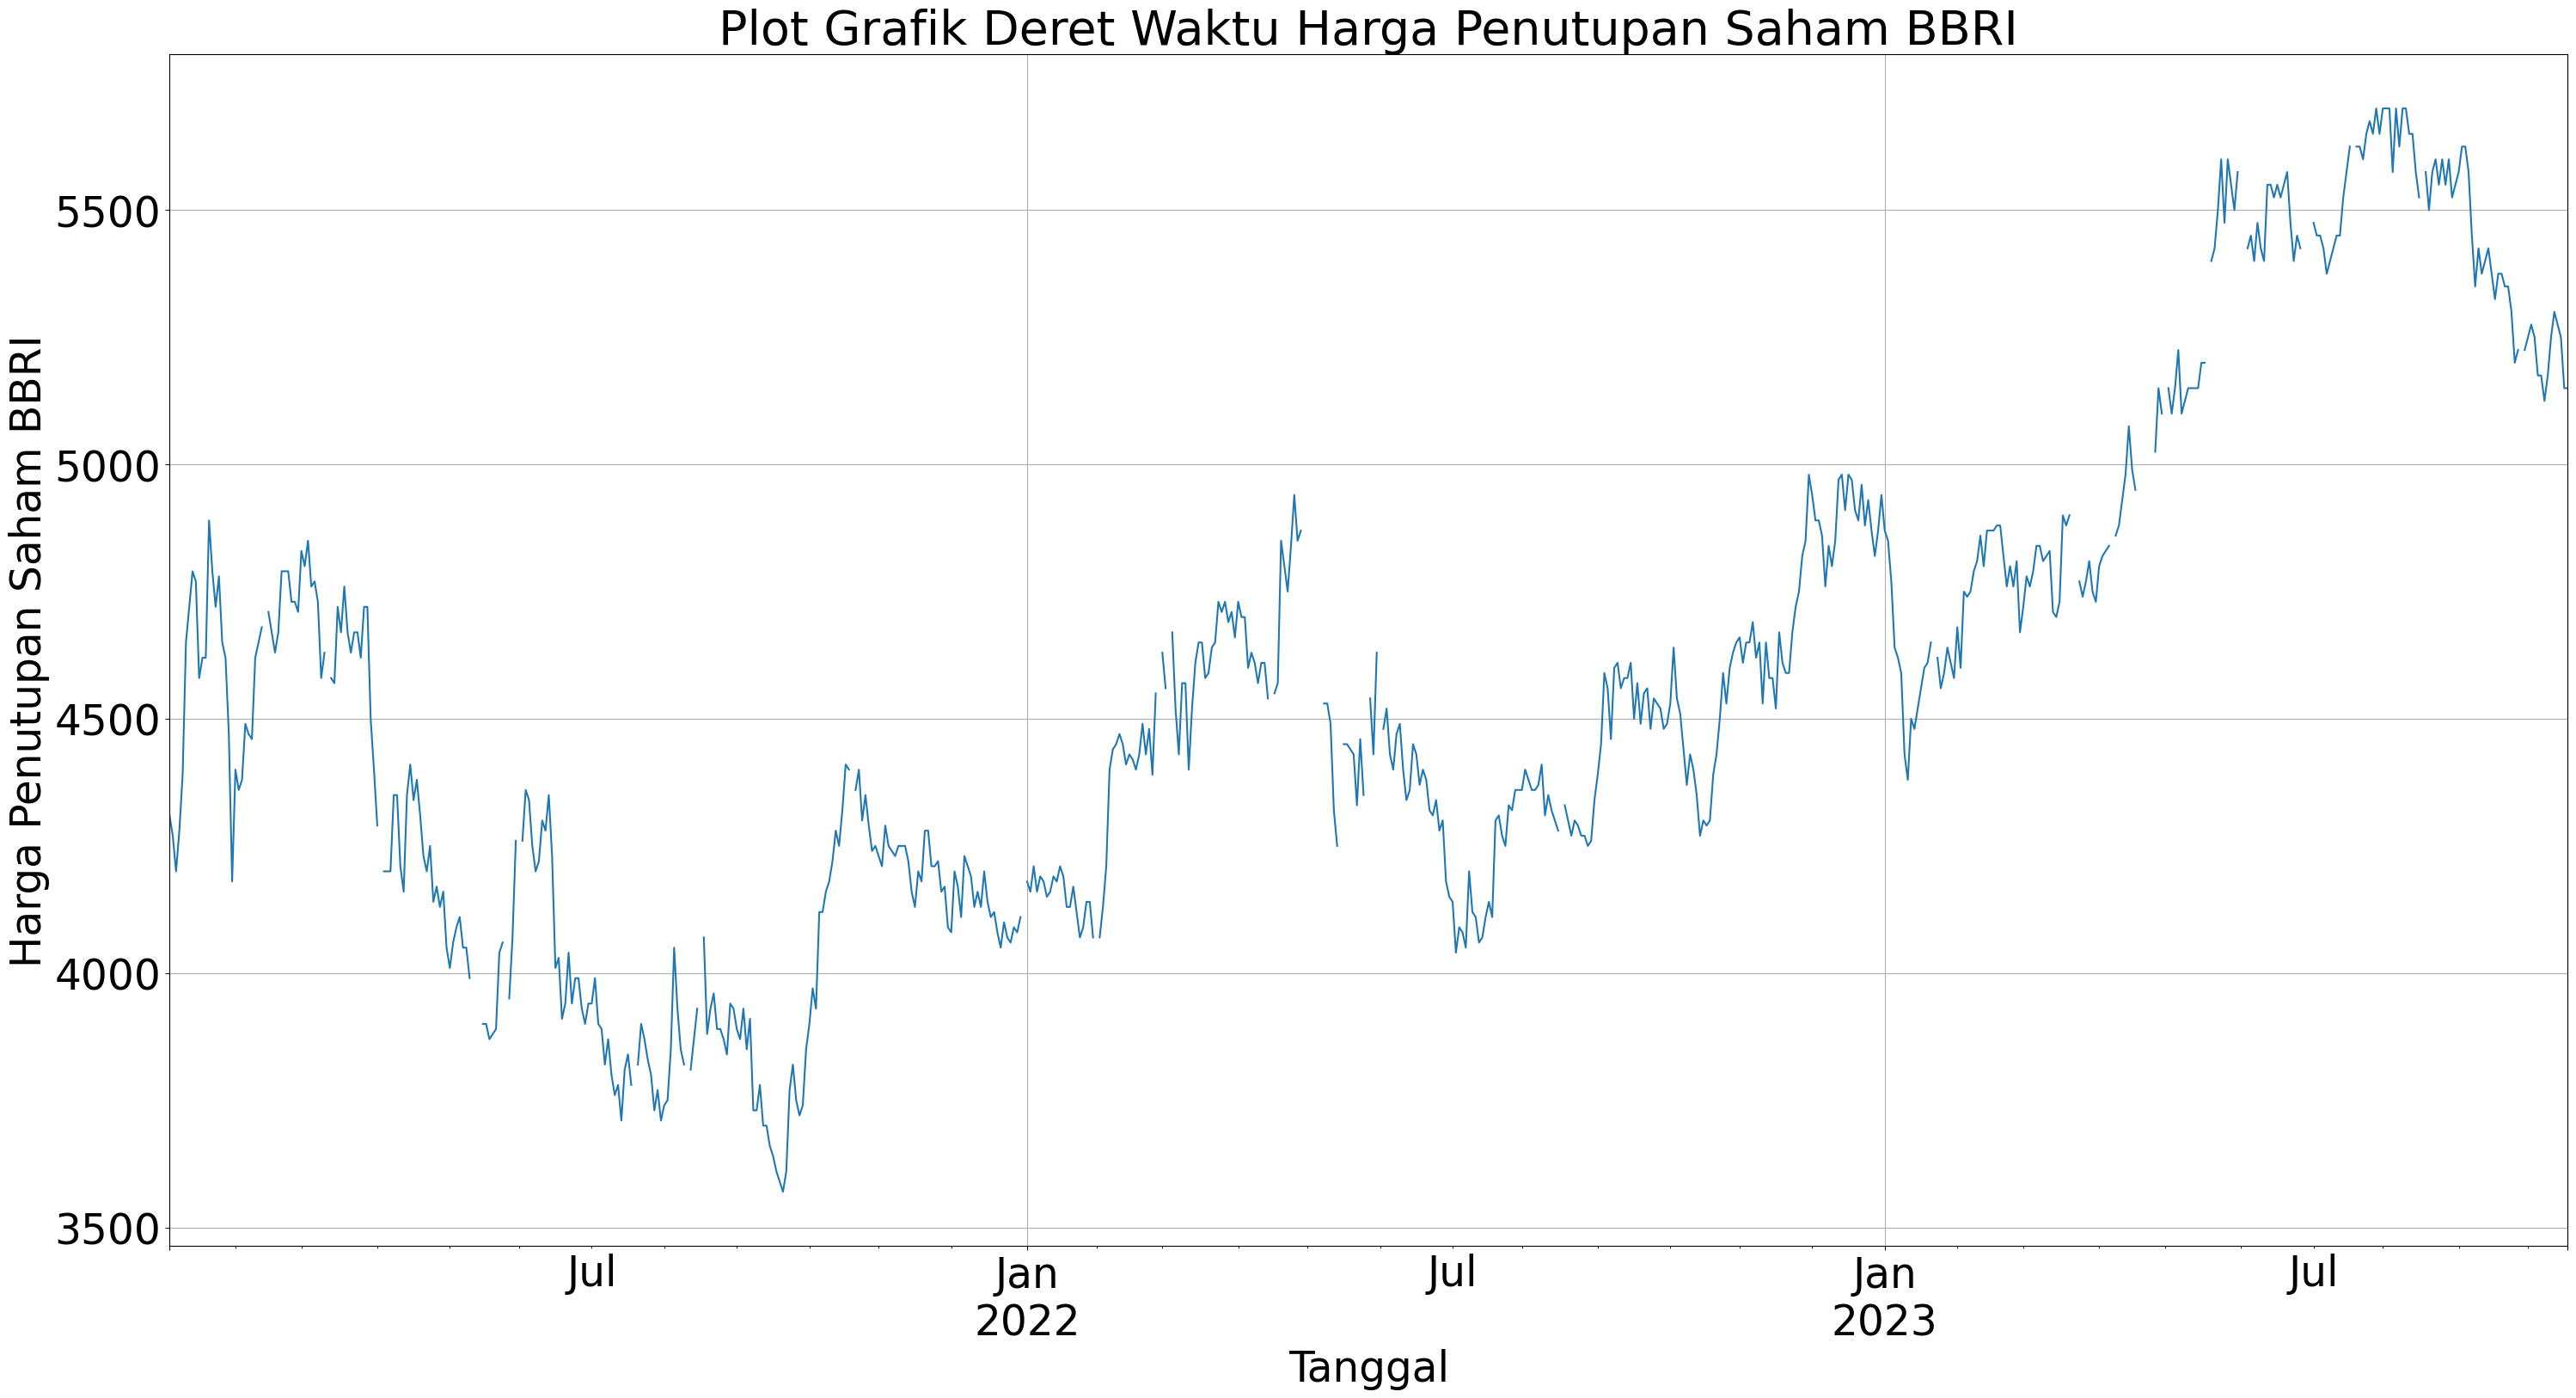

In [99]:
# Mengatur ukuran grafik
plt.figure(figsize=(36, 18))

# Plot deret waktu harga penutupan saham BBRI
df['close'].plot(grid=True)

# Menambahkan judul
plt.title('Plot Grafik Deret Waktu Harga Penutupan Saham BBRI', fontsize=40)

# Menambahkan label sumbu x dan sumbu y
plt.ylabel('Harga Penutupan Saham BBRI', fontsize=35)
plt.xlabel('Tanggal', fontsize=35)

# Mengatur ukuran font untuk nilai-nilai di sumbu x dan sumbu y
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

# Menampilkan grafik
plt.show()

In [100]:
print(df)

# Menghitung total jumlah data
total_data = len(df)
total_nan = df.isna().sum().sum()
print(f'Total Jumlah NaN: {total_nan}')
print(f'Total Jumlah Data: {total_data}')

             close
date              
2021-01-04  4310.0
2021-01-05  4270.0
2021-01-06  4200.0
2021-01-07  4280.0
2021-01-08  4390.0
...            ...
2023-10-12  5300.0
2023-10-13  5275.0
2023-10-16  5250.0
2023-10-17  5150.0
2023-10-18  5150.0

[728 rows x 1 columns]
Total Jumlah NaN: 46
Total Jumlah Data: 728


In [101]:
# train_df = df.loc['2021-01-04':'2023-06-27']
# test_df = df.loc['2023-07-03':'2023-10-18']

In [102]:
df['close'].fillna(method='ffill', inplace=True)

In [103]:
train_df = df.loc['2021-01-04':'2023-06-30']
test_df = df.loc['2023-07-03':'2023-10-18']

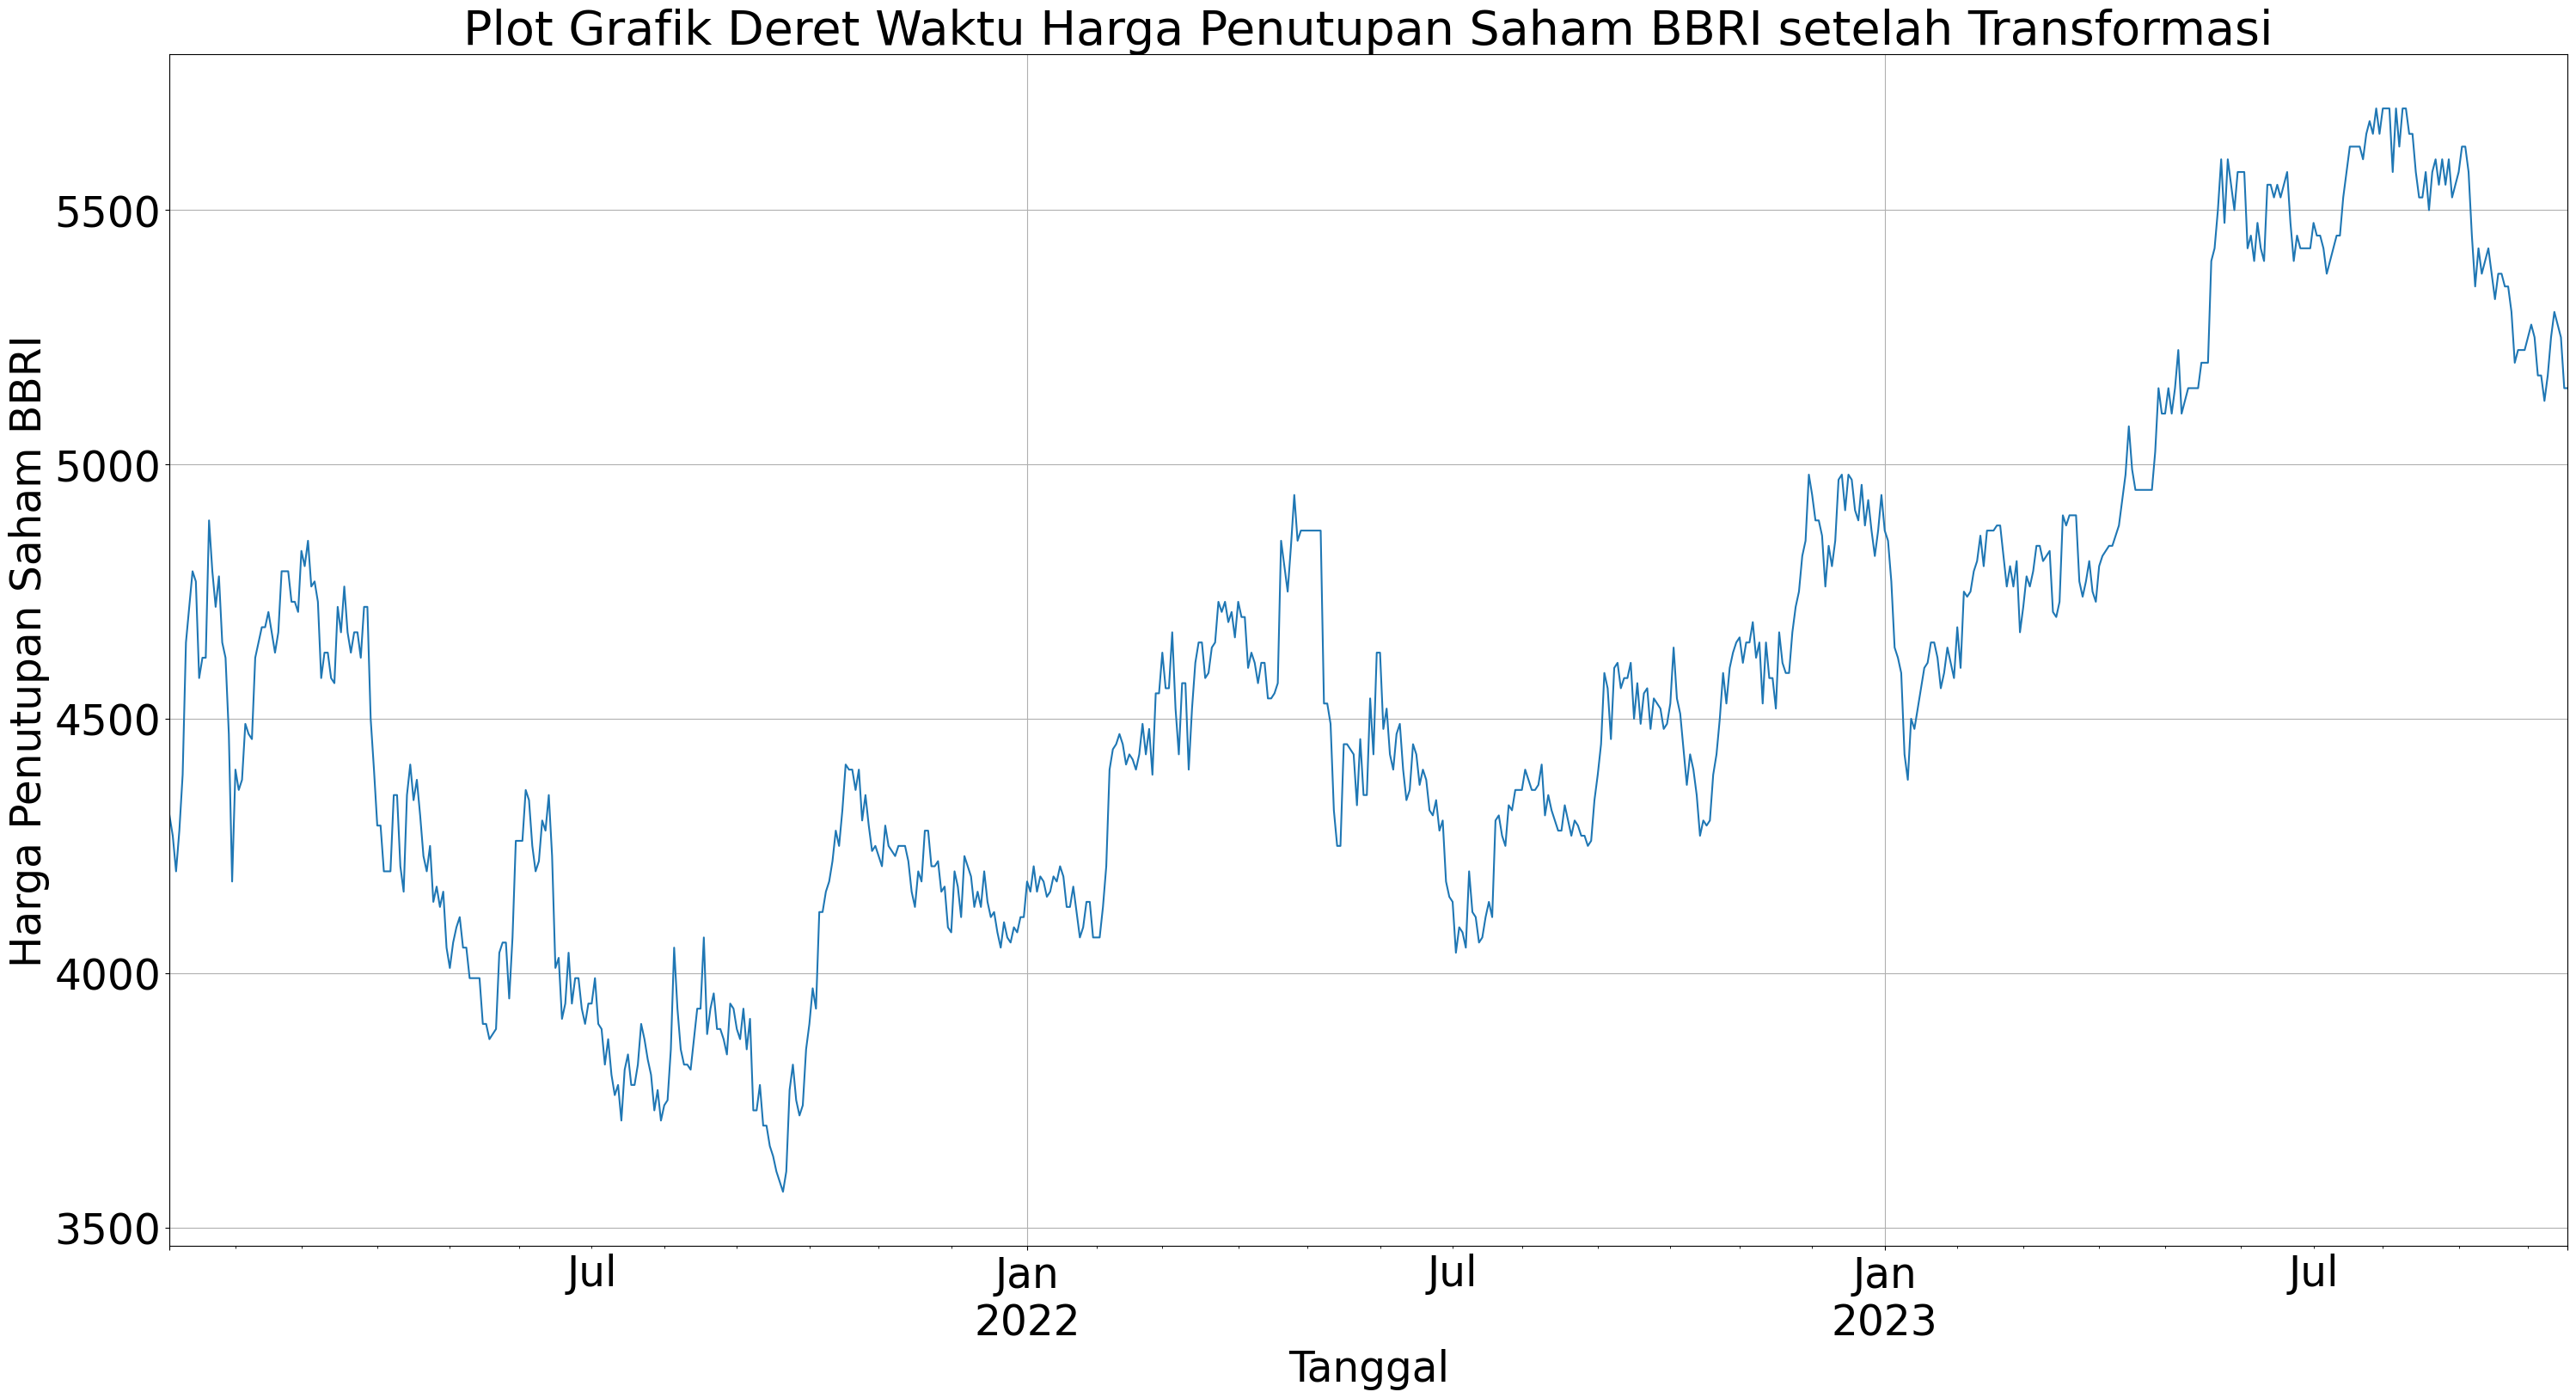

In [104]:
# Mengatur ukuran grafik
plt.figure(figsize=(36, 18))

# Plot deret waktu harga penutupan saham BBRI
df['close'].plot(grid=True)

# Menambahkan judul
plt.title('Plot Grafik Deret Waktu Harga Penutupan Saham BBRI setelah Transformasi', fontsize=40)

# Menambahkan label sumbu x dan sumbu y
plt.ylabel('Harga Penutupan Saham BBRI', fontsize=35)
plt.xlabel('Tanggal', fontsize=35)

# Mengatur ukuran font untuk nilai-nilai di sumbu x dan sumbu y
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

# Menampilkan grafik
plt.show()

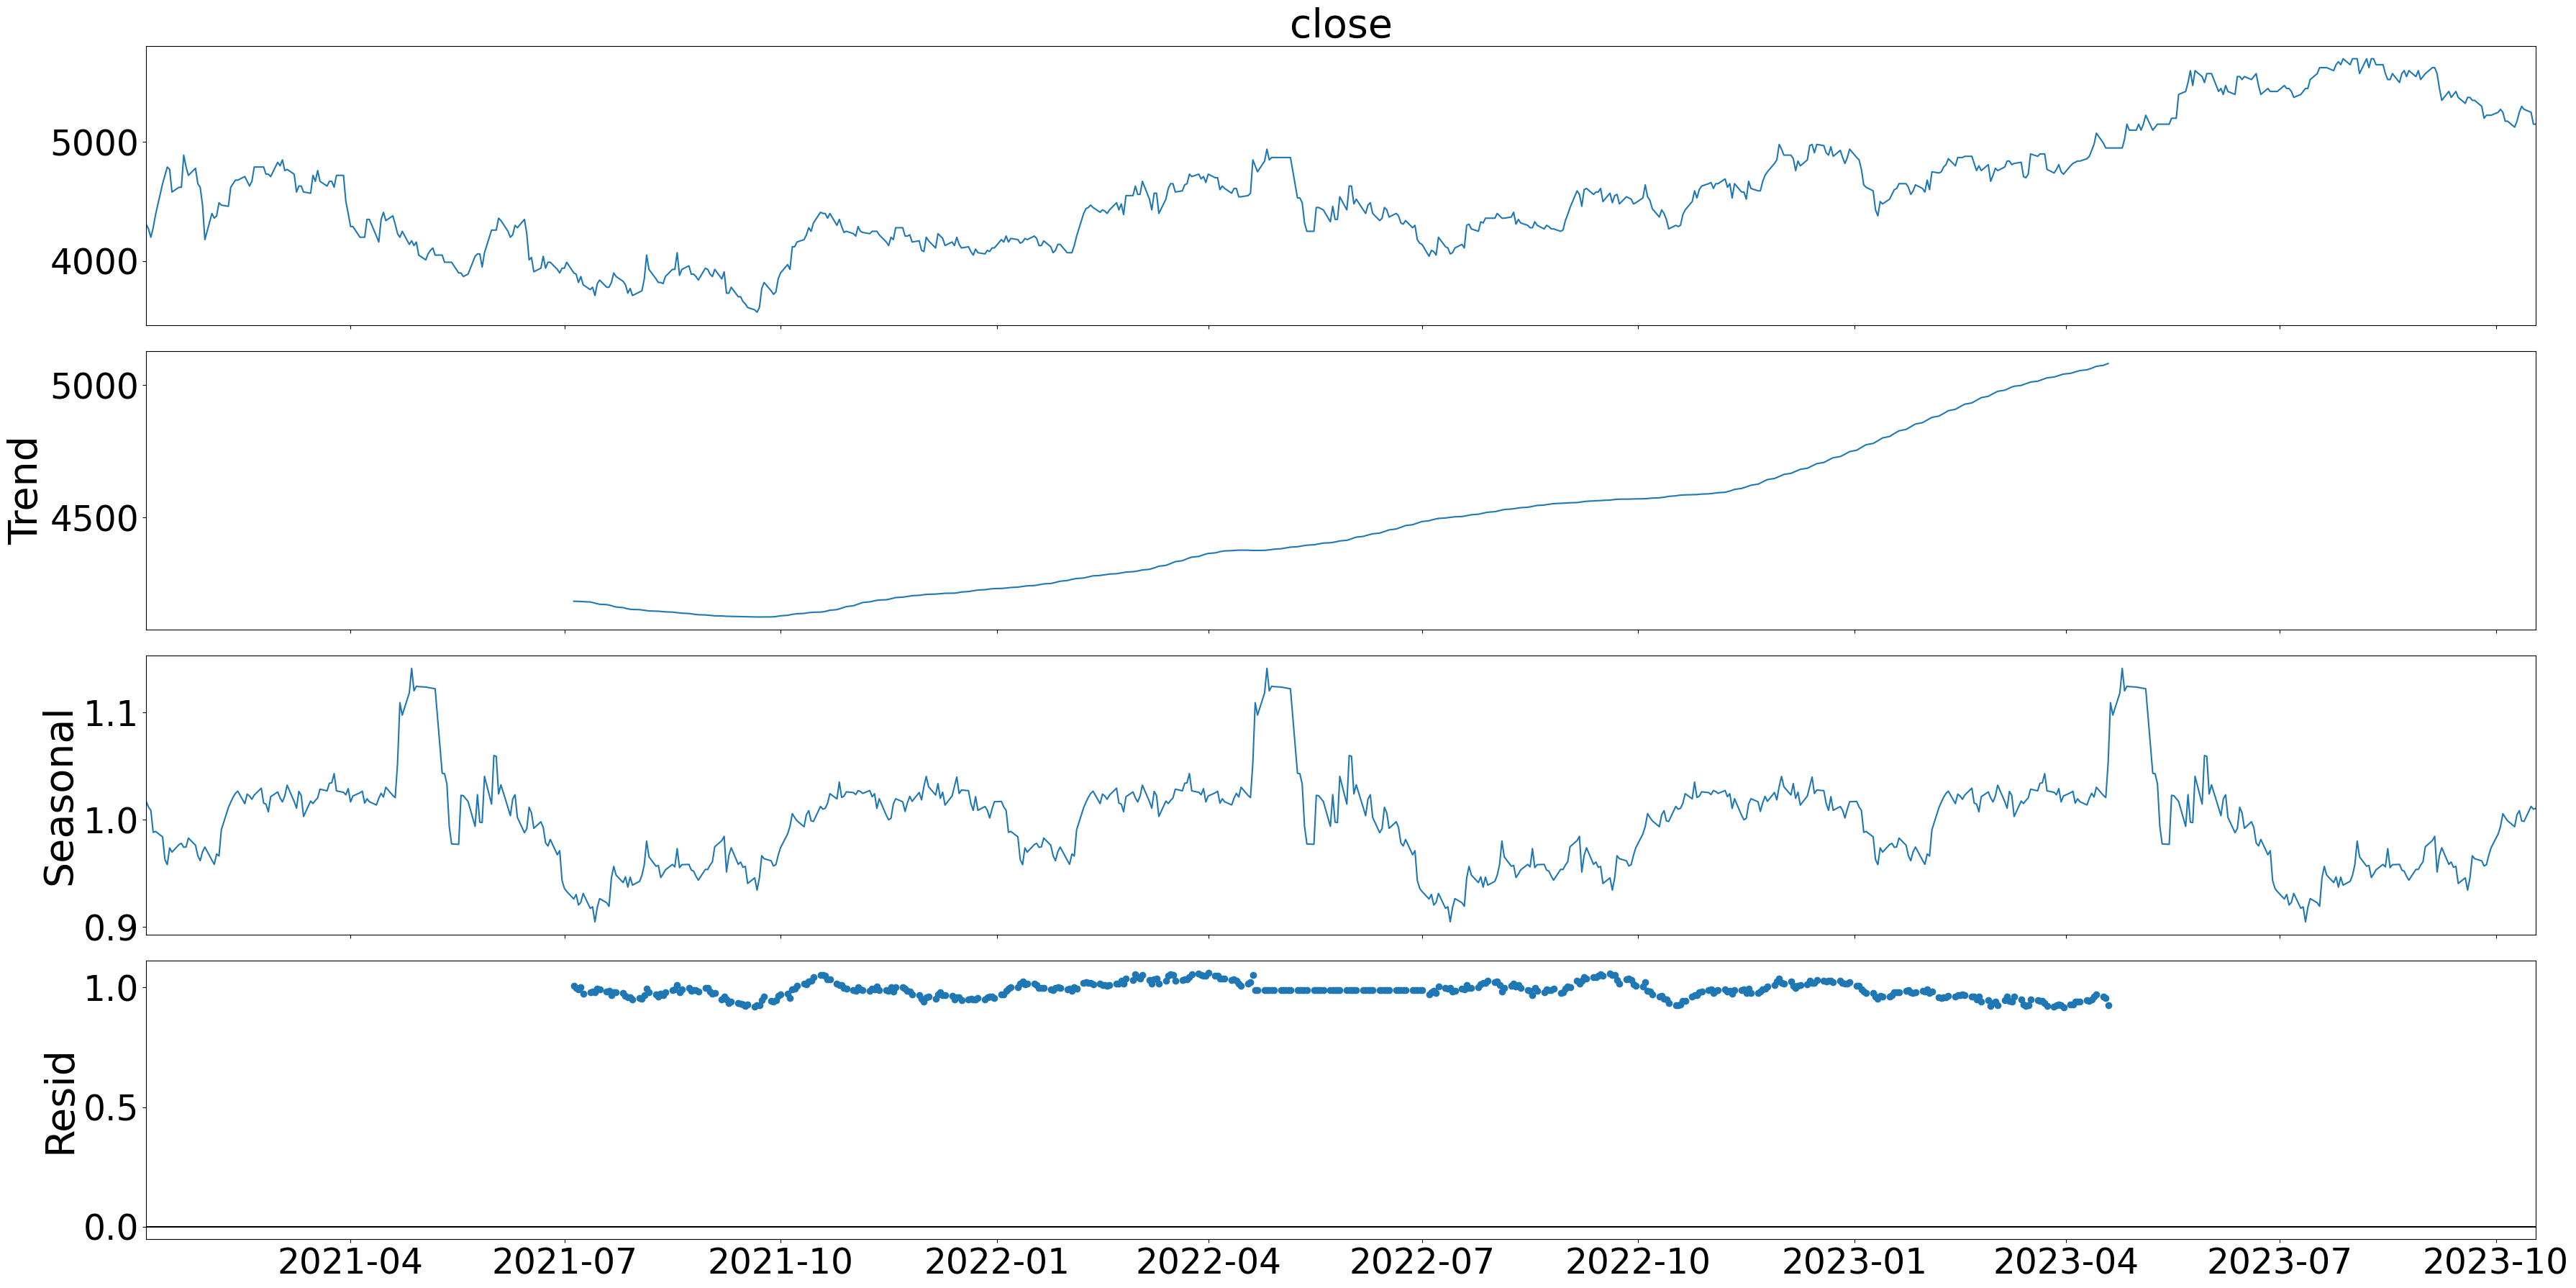

In [105]:
# Set the figsize for all plots
plt.rcParams["figure.figsize"] = (36, 18)

# Perform decomposition
decompose_mult = seasonal_decompose(df['close'], model='multiplicative', period=260)

# Modify the fontsize for title and labels
plt.rc('xtick', labelsize=35)
plt.rc('ytick', labelsize=35)
plt.rc('axes', titlesize=40, labelsize=40)  # Customize title and label fontsize

# Plot the decomposition
decompose_mult.plot()

# Show the plot
plt.show()


# Triple Exponential Smoothing

In [106]:
# best_alpha = None
# best_beta = None
# best_gamma = None
# best_seasonal_period = None
# best_mse = float('inf')  # Initialize with a high MSE value
# best_rmse = float('inf')  # Initialize with a high RMSE value
# best_mape = float('inf')  # Initialize with a high MAPE value

# # Loop melalui semua kombinasi alpha, beta, gamma, dan seasonal_period untuk evaluasi model
# alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# betas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# gammas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# seasonal_periods = list(range(258, 263))


# results = []  # Daftar untuk menyimpan semua hasil kombinasi


# for alpha in alphas:
#     for beta in betas:
#         for gamma in gammas:
#             for seasonal_period in seasonal_periods:
#                 model = ExponentialSmoothing(train_df['close'], seasonal='multiplicative', seasonal_periods=seasonal_period)
#                 model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
                
#                 # Make predictions for the test data
#                 predictions = model_fit.forecast(len(test_df))
                
#                 # Calculate MSE for this model
#                 mse = mean_squared_error(test_df['close'], predictions)
                
#                 # Calculate RMSE for this model
#                 rmse = sqrt(mse)
                
#                 # Calculate MAPE for this model
#                 mape = mean_absolute_percentage_error(test_df['close'], predictions) / test_df['close'].mean() * 100
                
#                 result = {
#                     'Alpha': alpha,
#                     'Beta': beta,
#                     'Gamma': gamma,
#                     'Seasonal Period': seasonal_period,
#                     'MSE': mse,
#                     'RMSE': rmse,
#                     'MAPE': mape
#                 }
#                 results.append(result)
                
#                 # Check if MSE, RMSE, and MAPE for the current model are better than the best so far
#                 if mse < best_mse and mape < best_mape:
#                     best_alpha = alpha
#                     best_beta = beta
#                     best_gamma = gamma
#                     best_seasonal_period = seasonal_period
#                     best_mse = mse
#                     best_rmse = rmse
#                     best_mape = mape
                
#                 # # Simpan grafik hasil prediksi dalam file
#                 # plt.figure()
#                 # plt.plot(test_df.index, test_df['close'], label='Actual')
#                 # plt.plot(test_df.index, prediksi, label='Forecast', color='red')
#                 # plt.xlabel('Date')
#                 # plt.ylabel('Closing Price')
#                 # plt.title('Harga Saham BBRI Forecasting')
#                 # plt.legend()
#                 # plt.grid(True)
#                 # plt.savefig(f'percobaan_190_310/forecast_{alpha}_{beta}_{gamma}_{seasonal_period}.png')
#                 # plt.close()

# # ...

# # Save all results to an Excel file (XLSX)
# results_df = pd.DataFrame(results)
# results_df.to_excel('hasil_model_mult_trend_mult.xlsx', index=False, engine='xlsxwriter')

# # Display the best results
# print(f"Best Alpha: {best_alpha}")
# print(f"Best Beta: {best_beta}")
# print(f"Best Gamma: {best_gamma}")
# print(f"Best Seasonal Period: {best_seasonal_period}")
# print(f"Best MSE: {best_mse}")
# print(f"Best RMSE: {best_rmse}")
# print(f"Best MAPE: {best_mape}%")

# # Create a dataframe for the best results
# best_results_df = pd.DataFrame([{
#     'Best Alpha': best_alpha,
#     'Best Beta': best_beta,
#     'Best Gamma': best_gamma,
#     'Best Seasonal Period': best_seasonal_period,
#     'Best MSE': best_mse,
#     'Best RMSE': best_rmse,
#     'Best MAPE': best_mape
# }])

# # Save the best results to a separate Excel file
# best_results_df.to_excel('best_results_mult_trend_mult.xlsx', index=False, engine='xlsxwriter')


C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


20 Hasil Prediksi Awal:
2023-07-03    5533.432399
2023-07-04    5443.948547
2023-07-05    5434.499844
2023-07-06    5581.190086
2023-07-07    5366.700647
2023-07-10    5397.097860
2023-07-11    5295.989194
2023-07-12    5392.894255
2023-07-13    5439.362366
2023-07-14    5407.088128
2023-07-17    5354.548742
2023-07-18    5629.963550
2023-07-19    5573.424944
2023-07-20    5494.266452
2023-07-21    5463.272716
2023-07-24    5539.558277
2023-07-25    5440.956012
2023-07-26    5510.052364
2023-07-27    5448.274729
2023-07-28    5463.840304
Freq: B, dtype: float64
Mean Squared Error (MSE): 27914.66577070266
Mean Absolute Percentage Error (MAPE): 0.02525128205913958
Root Mean Squared Error (RMSE): 167.07682595351955

DataFrame Hasil Prediksi:


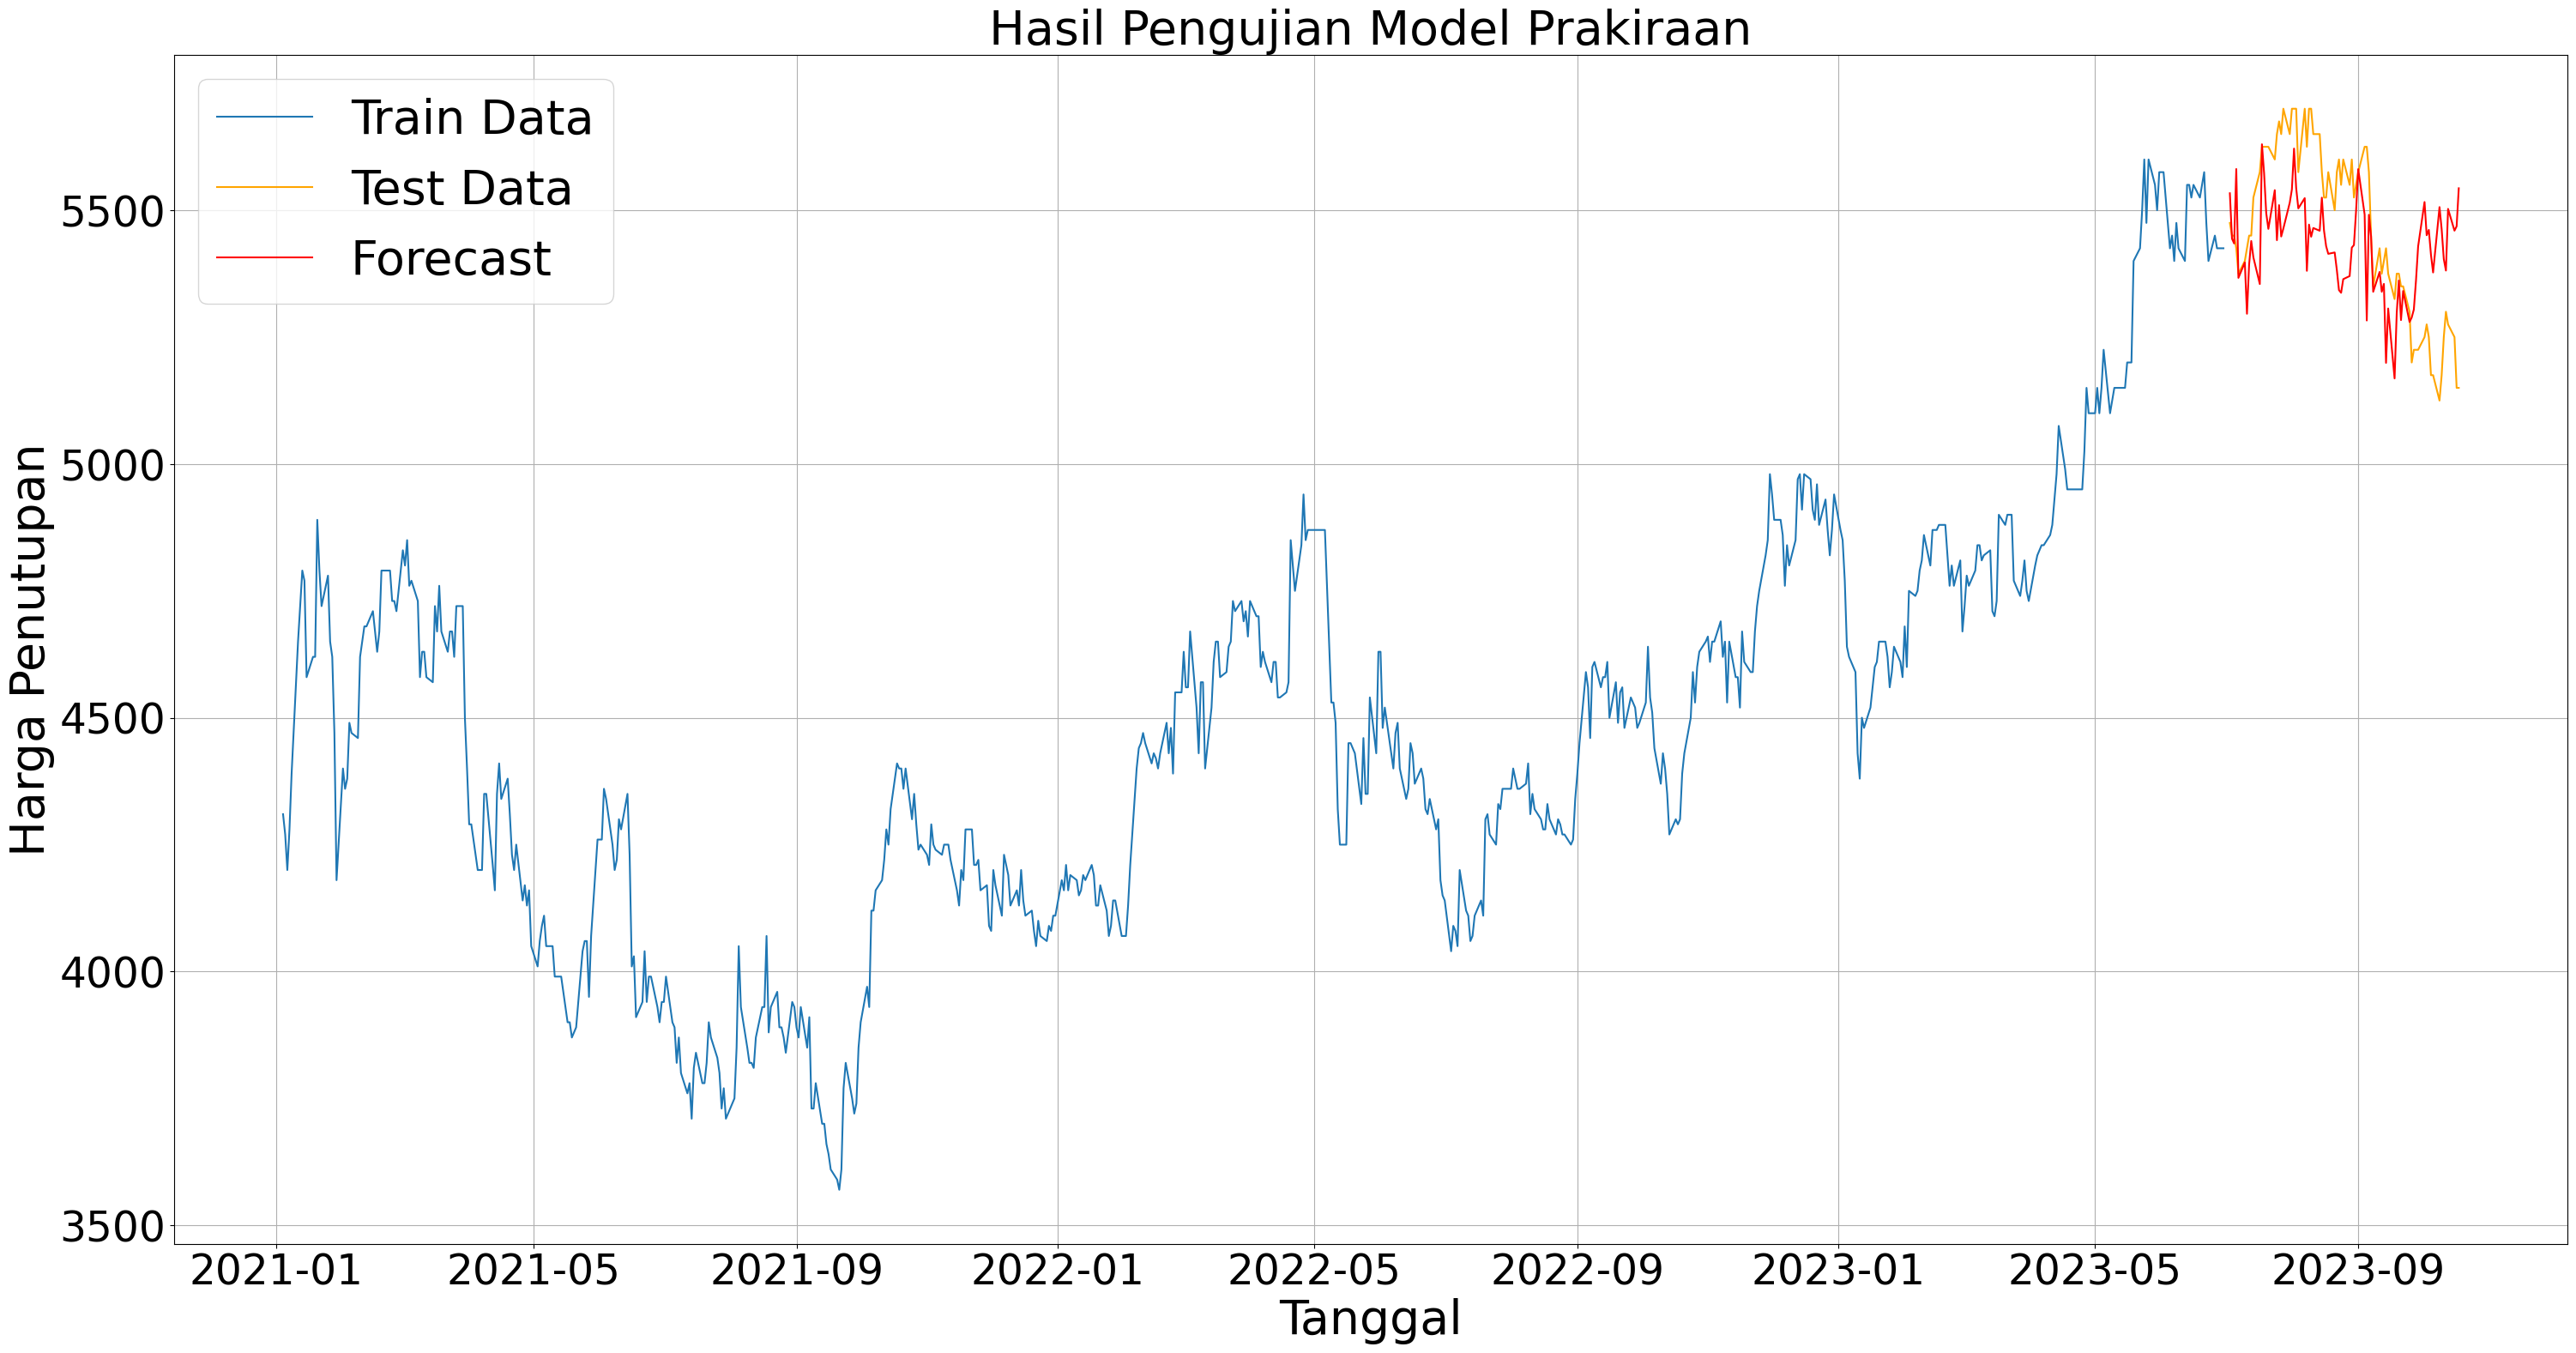

In [116]:
# Tentukan parameter alpha, beta, dan gamma
alpha = 0.9
beta = 0.1
gamma = 0.8
seasonal_period = 259

# Membuat model Triple Exponential Smoothing
model = ExponentialSmoothing(train_df['close'], seasonal='multiplicative', seasonal_periods=seasonal_period)
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)

# Buat prediksi untuk tanggal yang diminta
forecast = model_fit.forecast(len(test_df))

# Buat prediksi untuk 20 periode awal
forecast_initial = model_fit.forecast(steps=20)

# Menyimpan hasil prediksi ke dalam DataFrame
common_length = min(len(test_df.index), len(forecast))
forecast_df = pd.DataFrame({'Date': test_df.index[:common_length], 'Actual': test_df['close'].values[:common_length], 'Forecast': forecast[:common_length]})

# Menyimpan DataFrame ke dalam file Excel
forecast_df.to_excel('forecast_results_1.xlsx', index=False)

# Tampilkan hasil prediksi 20 periode awal
print("20 Hasil Prediksi Awal:")
print(forecast_initial)

# Hitung metrik evaluasi (MSE, MAPE, dan RMSE)
mse = mean_squared_error(test_df['close'], forecast)
mape = mean_absolute_percentage_error(test_df['close'], forecast)
rmse = np.sqrt(mse)

# Tampilkan metrik evaluasi
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot hasil forecast
plt.figure(figsize=(36, 18))
plt.plot(train_df.index, train_df['close'], label='Train Data')
plt.plot(test_df.index, test_df['close'], label='Test Data', color='orange')
plt.plot(test_df.index, forecast, label='Forecast', color='red')

plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.title('Hasil Pengujian Model Prakiraan')
plt.legend(fontsize=40)
plt.grid(True)

# Tampilkan DataFrame hasil prediksi
print("\nDataFrame Hasil Prediksi:")



C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


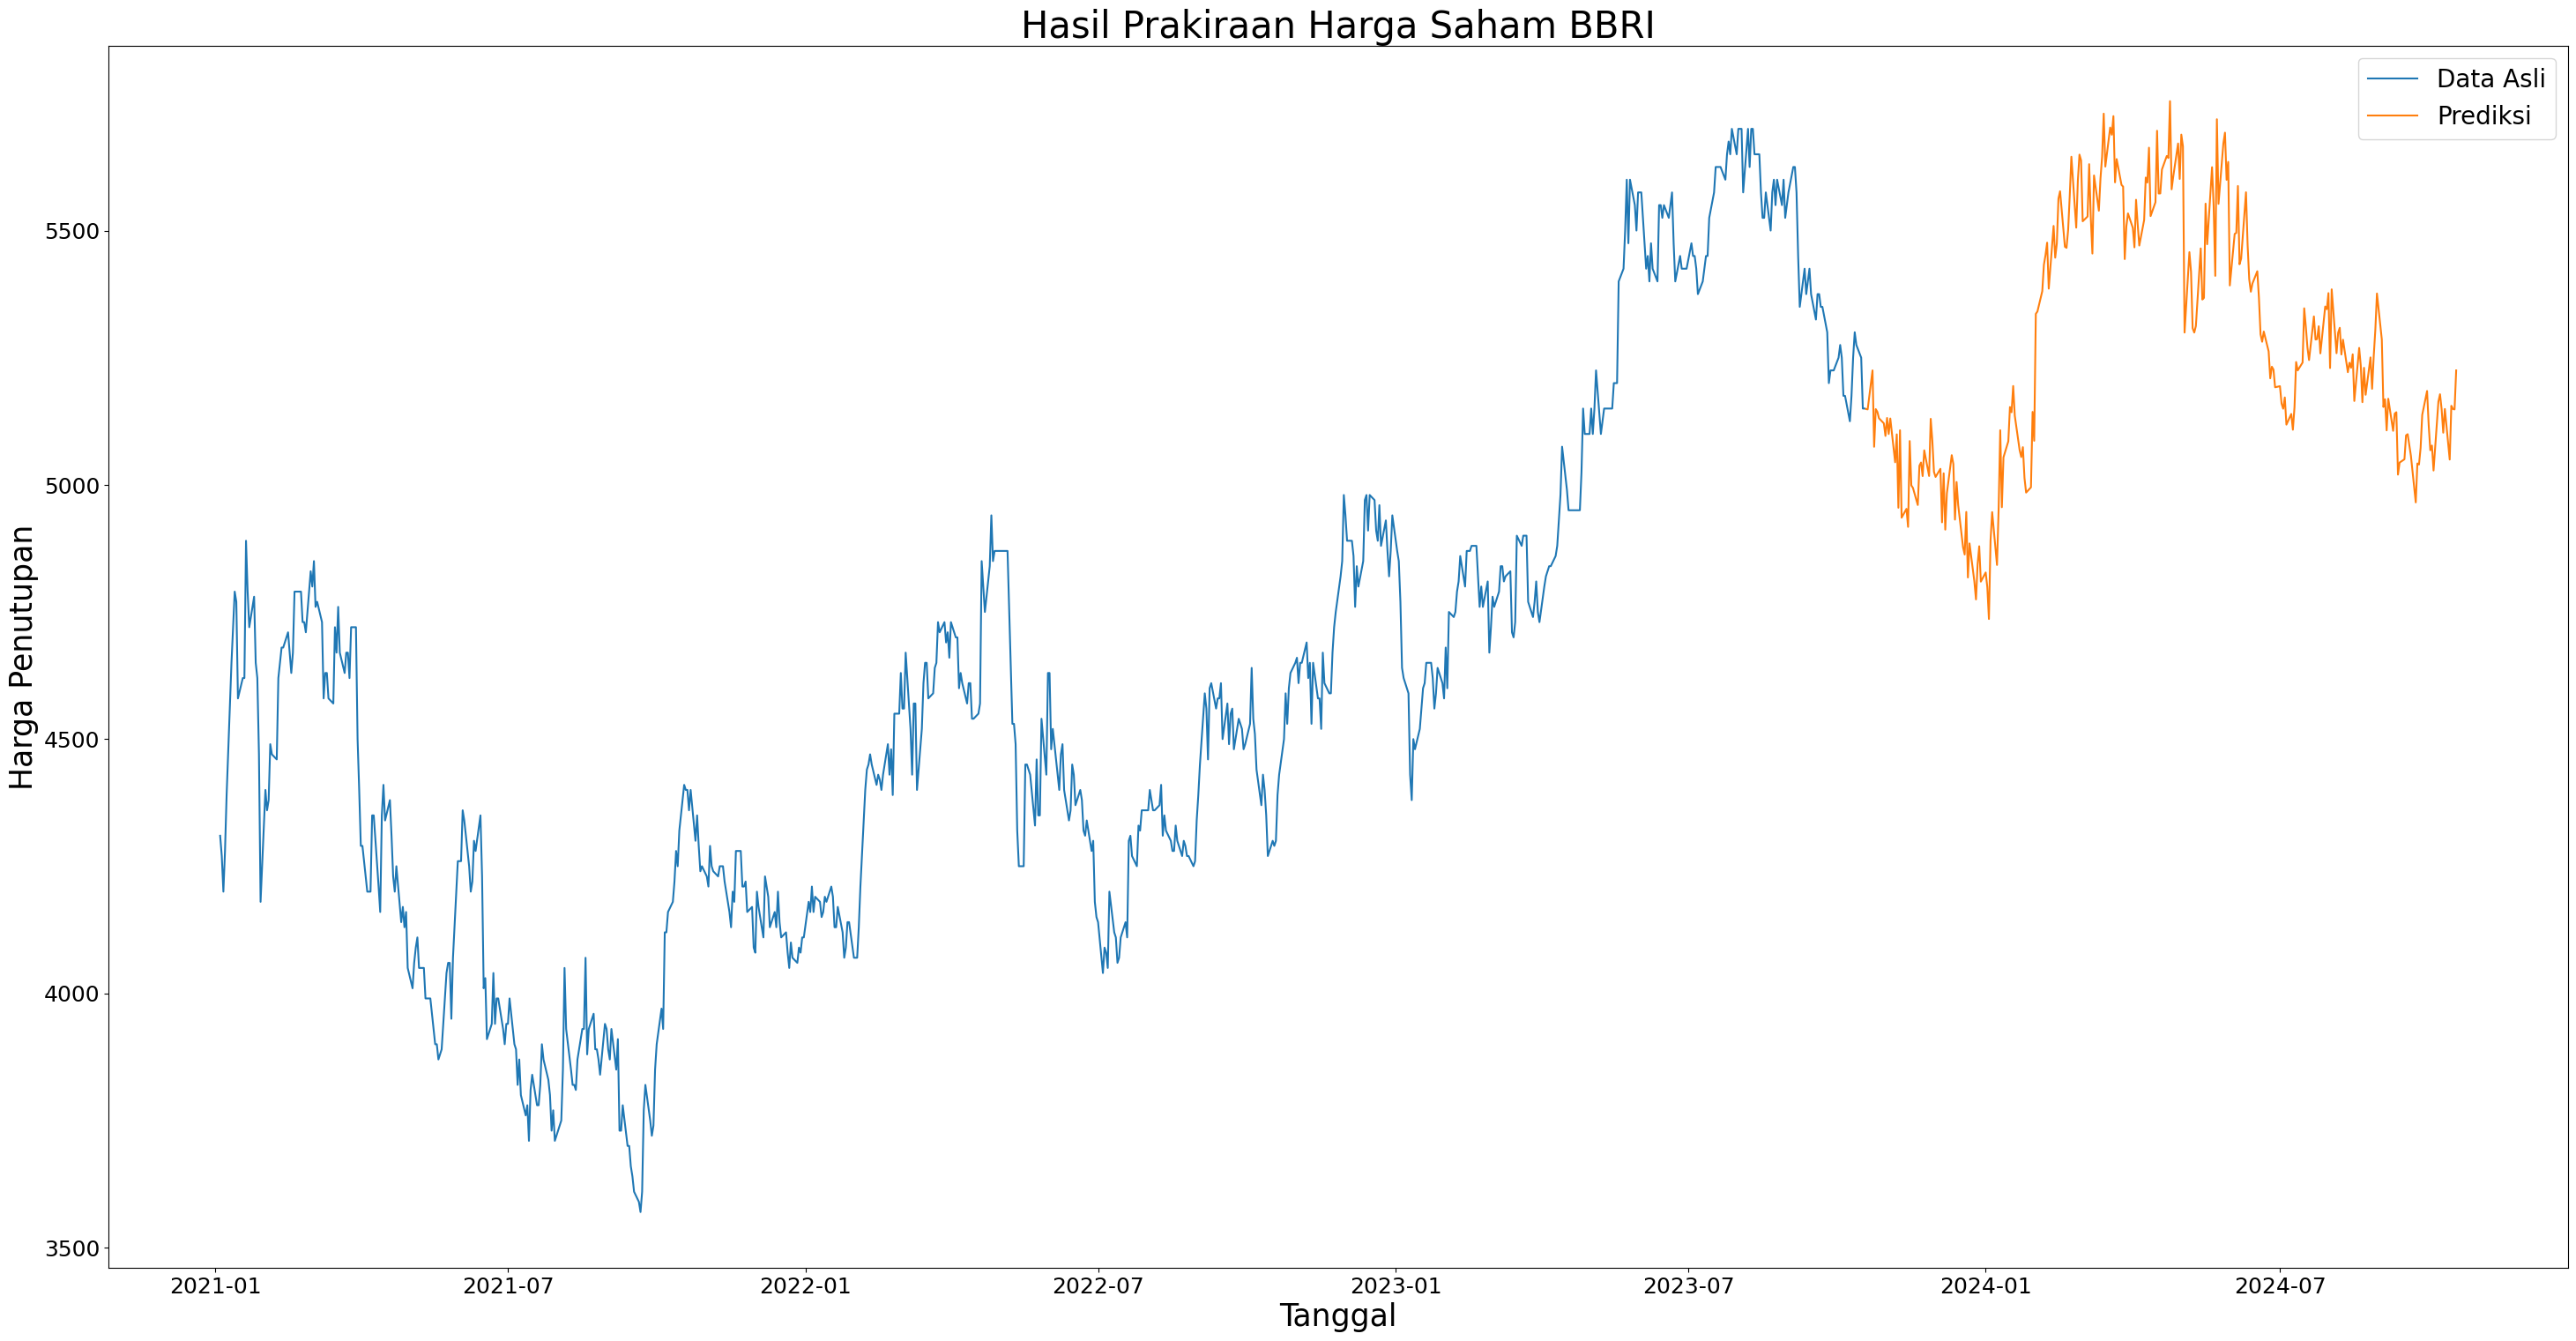

In [108]:
# Inisialisasi variabel untuk menyimpan hasil terbaik
alpha = 0.9
beta = 0.1
gamma = 0.8
seasonal_period = 259

# Prediksi akan dimulai dari tanggal 2023-05-25
start_date = '2023-10-19'

# Buat DataFrame tanggal prediksi
tanggal_prediksi = pd.date_range(start=start_date, end='2024-10-19', freq='B')

model = ExponentialSmoothing(df['close'], seasonal='multiplicative', seasonal_periods=seasonal_period)
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)

# Buat prediksi untuk tanggal yang diminta
prediksi = model_fit.forecast(len(tanggal_prediksi))
df_prediksi = pd.DataFrame({'Tanggal': tanggal_prediksi, 'Prediksi': prediksi})

# Menyimpan DataFrame ke dalam file Excel
file_excel_output = 'prediksi_saham_bbri.xlsx'
df_prediksi.to_excel(file_excel_output, index=False)

# Tampilkan hasil prediksi
plt.figure(figsize=(36, 18))
plt.plot(df.index, df['close'], label='Data Asli')
plt.plot(tanggal_prediksi, prediksi, label='Prediksi')
plt.title(f'Hasil Prakiraan Harga Saham BBRI', fontsize=30)
plt.xlabel('Tanggal', fontsize=25)  # Label x-axis dengan ukuran font 20
plt.ylabel('Harga Penutupan', fontsize=25)  # Label y-axis dengan ukuran font 20
# Mengubah ukuran font pada label legenda menjadi 20
plt.legend(fontsize=20)

# Mengubah ukuran poin pada sumbu x dan y
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()  # Tampilkan plot


In [109]:
# import pickle

In [110]:
# with open('prakiraan_sahamBBRI.sav', 'wb') as model_file:
#         pickle.dump(model_fit, model_file)